# Titanic EDA Notebook 

In [54]:
# import packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
def count_plot(df, feature, hue):
    
    if hue != None :
        ax = sns.countplot(x=feature, hue=hue, data=df)
        for container in ax.containers:
            ax.bar_label(container)
        return ax
    else :
        g = sns.catplot(x=feature, data=df, kind='count')
        for ax in g.axes.flat:
            ax.bar_label(ax.containers[0])
        return g 


In [56]:
test_set = pd.read_csv(r"C:/Users/Yehonatan/PycharmProject/DS/projects/titanic/ignore/test.csv")
train_set = pd.read_csv(r"C:/Users/Yehonatan/PycharmProject/DS/projects/titanic/ignore/train.csv")

df_original = pd.concat([train_set,test_set], axis=0, ignore_index=True )
df_train = (train_set.copy()).rename(columns=str.lower)
df_test = (test_set.copy()).rename(columns=str.lower)

df = (df_original.copy()).rename(columns=str.lower)

# Missing values 
The missing values in each feature to deal with 

In [57]:
df_Nans = df.isnull().sum().sort_values(ascending=False)
print('The missing values of each feature are:')
print(df_Nans)

The missing values of each feature are:
cabin          1014
survived        418
age             263
embarked          2
fare              1
passengerid       0
pclass            0
name              0
sex               0
sibsp             0
parch             0
ticket            0
dtype: int64


# Survival - Gender Analysis
As we can see in plot1 the survival chances for women was ~ 74% and for men ~ 19% 

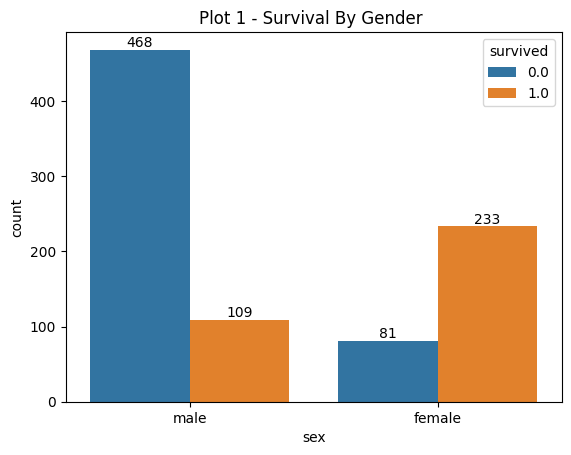

In [58]:
graph = count_plot(df, 'sex', 'survived').set(title='Plot 1 - Survival By Gender ')

# Survival - Age Analysis
first we can look at the distribution. As seen in plot 2 it isn't a normal distribution. Performing a Shapiro- Wilk test reassures it. Trying to 'normalize' the data might help the algorithms (taking the log or the square of the data).
For an easier analysis a division to age groups was made. (0-15) kids, (15-24) young adults, (24-64) adults,(64-80) seniors. 
We can see in plot 3, that the age group that has the most substantial surviving chances is (0 - 15) with 59%.
If we take analysis further we can see that male age group (0-15) has the best chances of survival with 52%(plot 4) and for female it is the adult group (24-64) with 78% (plot 5)


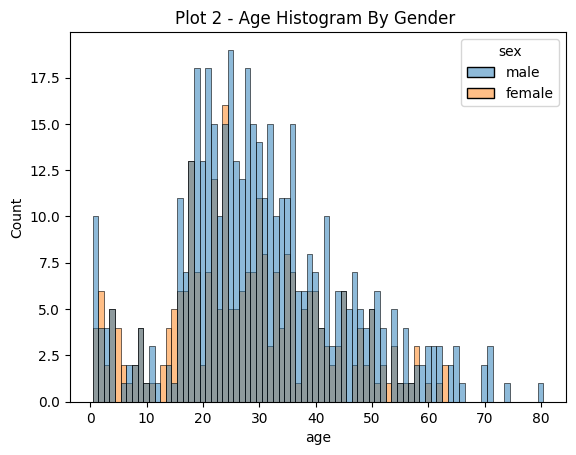

In [59]:
graph = sns.histplot(data = df_train , x="age", binwidth=1 ,hue='sex').set(title='Plot 2 - Age Histogram By Gender ')

Text(0.5, 1.0, 'Plot 3 - Survival by Age Group')

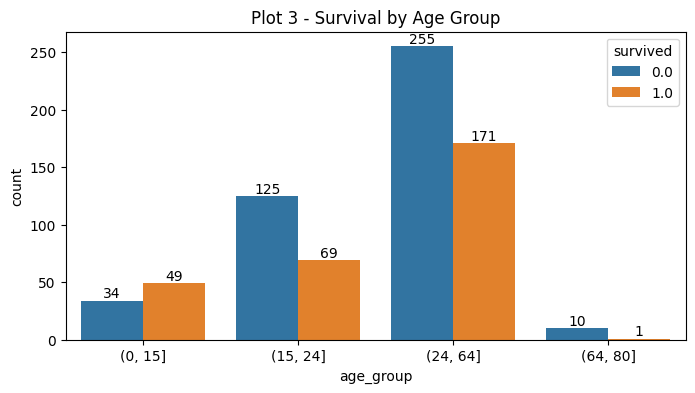

In [60]:
#labels_age = np.linspace(1,10,10, dtype = 'int')
# df['age_group'] = pd.qcut(df['age'], 5)
bins = pd.IntervalIndex.from_tuples([(0,15),(15,24),(24,64),(64,80)])
df['age_group'] = pd.cut(df['age'], bins)

fig = plt.figure()
fig.set_size_inches((8,4))

ax = sns.countplot(x='age_group', hue='survived', data=df)
for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Plot 3 - Survival by Age Group')



Text(0.5, 1.0, 'Plot 4 - Survival by Age Group - Male')

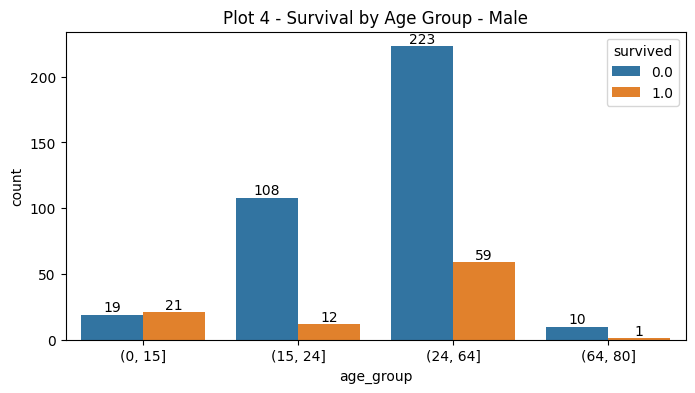

In [61]:
bins = pd.IntervalIndex.from_tuples([(0,15),(15,24),(24,64),(64,80)])
df['age_group'] = pd.cut(df['age'], bins)

fig = plt.figure()
fig.set_size_inches((8,4))

ax = sns.countplot(x='age_group', hue='survived', data=df[df['sex']=='male'])
for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Plot 4 - Survival by Age Group - Male')

Text(0.5, 1.0, 'Plot 5 - Survival by Age Group - Female')

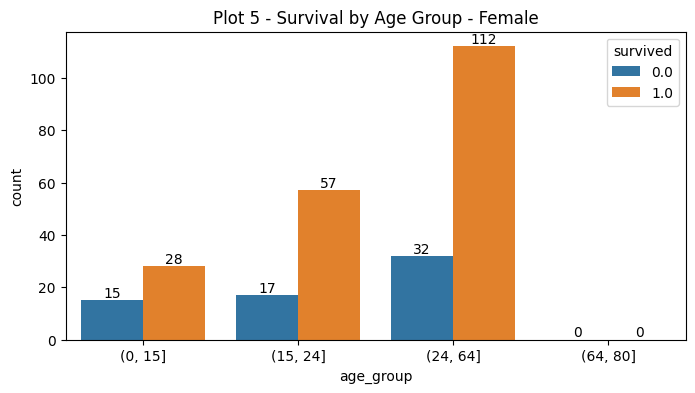

In [62]:
bins = pd.IntervalIndex.from_tuples([(0,15),(15,24),(24,64),(64,80)])
df['age_group'] = pd.cut(df['age'], bins)

fig = plt.figure()
fig.set_size_inches((8,4))

ax = sns.countplot(x='age_group', hue='survived', data=df[df['sex']=='female'])
for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Plot 5 - Survival by Age Group - Female')

# Survival - Fare Analysis
The feature 'fare' is a continuous one. so, in order to see the survival chances that depends on the fare, it was needed to bin it. Even though the binning is made by Quantile-based discretization the trend is clear. We can see that as the fare grows so do the percentage of survival


Text(0.5, 1.0, 'Plot 6 - Survival by Fare Group')

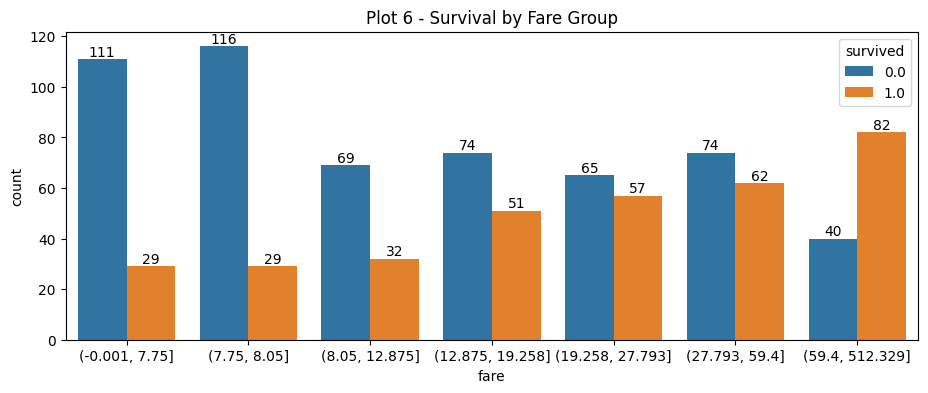

In [63]:
t_class_mean = round(df[df["pclass"] == 3 ]['fare'].mean(numeric_only=True),2)
df.at[1043, 'fare'] = t_class_mean


df['fare'] = pd.qcut(df['fare'], 7)
fig = plt.figure()
fig.set_size_inches((11,4))

ax = sns.countplot(x='fare', hue='survived', data=df)
for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Plot 6 - Survival by Fare Group')

# Survival - Class Analysis
3rd class passengers had the worst chance of survival ~ 24%. They were the farthest from the boat's top deck were the rescue boats were.


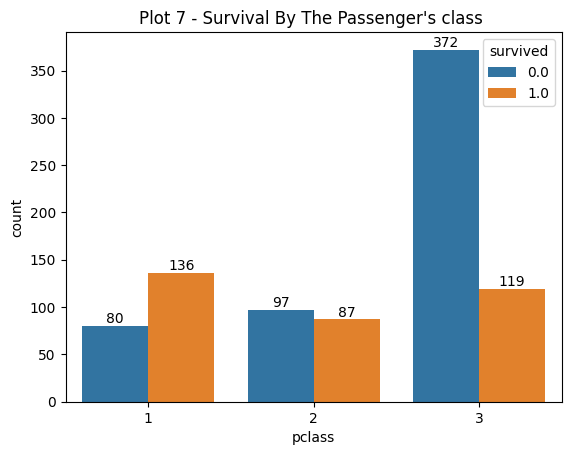

In [64]:
graph = count_plot(df, 'pclass', 'survived').set(title="Plot 7 - Survival By The Passenger's class ")

# Survival - Embarking Location Analysis
For those who embarked from S - 'Southampton' the chances were the worst ~ 34%(plot 8). and those who embarked from C - 'Cherbourg' had the best chances 55%. Not surprisingly we can see that most of the passengers at Southampton were 3rd class and most of Cherbourg's passengers were 1st class (plot 9 and plot 10 accordingly).


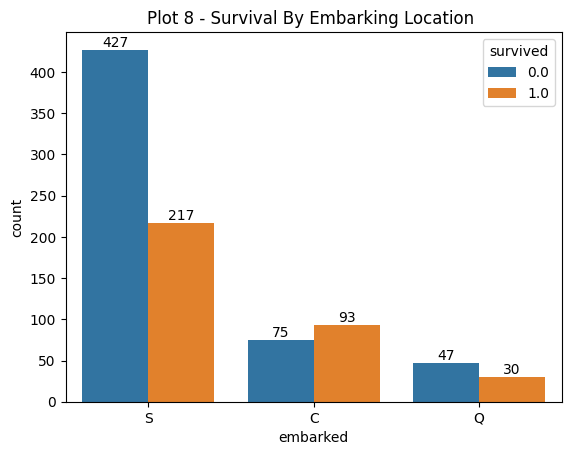

In [65]:
graph = count_plot(df, 'embarked', 'survived').set(title="Plot 8 - Survival By Embarking Location ")

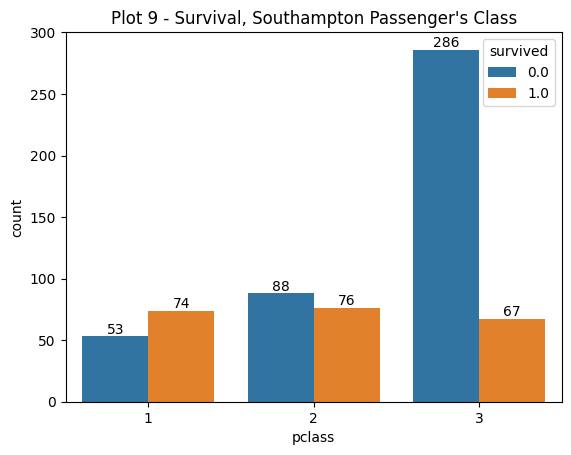

In [66]:
graph = count_plot(df[df['embarked'] == 'S'], 'pclass', 'survived').set(title="Plot 9 - Survival, Southampton Passenger's Class")

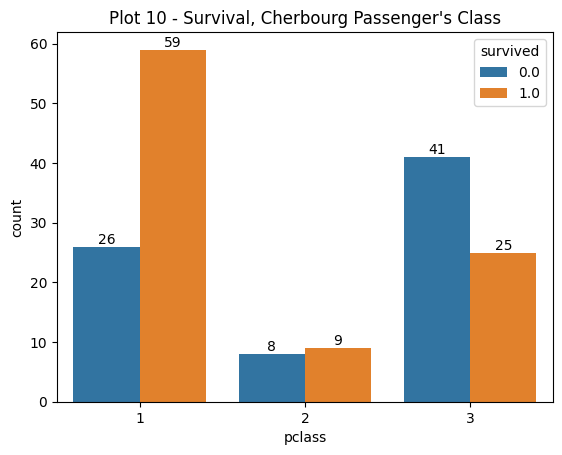

In [67]:
graph = count_plot(df[df['embarked'] == 'C'], 'pclass', 'survived').set(title="Plot 10 - Survival, Cherbourg Passenger's Class")

# Survival - Family Size Analysis
We can see that most of the passengers were lone travelers and that those with small families of 2,3 or 4 family members had over 50% chances of survival.


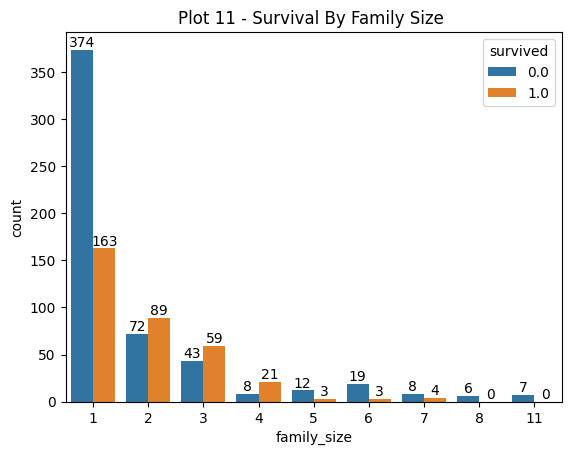

In [68]:
df['family_size'] = df['sibsp'] + df['parch'] +1
graph = count_plot(df, 'family_size', 'survived').set(title="Plot 11 - Survival By Family Size ")

# Summary and Insights
- Women had better chances of survival than men
- Among Female the adult group (24-64) had the better chances to survive ~ 78%
- Among Male the kids group (0-15) had the better chances to survive ~ 52%
- The higher the fare group the chances of survival grew
- Being a 1st class passengers Increased the chances to survive. So those who embarked from Cherbourg had a better chance ~55%.
- Small families had over 50% chances of survival
- Generally, we can say that the profile of the passenger that had the best chances to survive is an adult female who departed from Cherbourg with a small family.
